# Using the Census Urls

In [1]:

import matplotlib.pylab as plt
import logging
from publicdata.census.files import logger
#logging.basicConfig()
#logger.setLevel(logging.DEBUG)

import shapely
shapely.__version__

'1.6.4.post2'

# Creating New Urls and Dataframes

In [2]:
from rowgenerators import parse_app_url
u = parse_app_url('census://2016/5/CA/county/B01002')
df = u.dataframe
df.table

#,Name,Short Description,Description
0,GEOID,None,GEOID
1,STUSAB,None,STUSAB
2,COUNTY,None,COUNTY
3,NAME,None,NAME
4,B01002_001,Total:,MEDIAN AGE BY SEX for Total Population% Total:
5,B01002_001_m90,None,
6,B01002_002,Male,MEDIAN AGE BY SEX for Total Population% Male
7,B01002_002_m90,None,
8,B01002_003,Female,MEDIAN AGE BY SEX for Total Population% Female
9,B01002_003_m90,None,


In [3]:
# Display some table metadata
from publicdata.census.files.metafiles import TableMeta

tm = TableMeta(2016, 5)
print(len(tm.tables))
print(list(tm.states)[:10])


1046
['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL']


In [4]:
df.head()

,STUSAB,COUNTY,NAME,B01002_001,B01002_001_m90,B01002_002,B01002_002_m90,B01002_003,B01002_003_m90
GEOID,,,,,,,,,
05000US06001,CA,001,"Alameda County, California",37.2,0.1,36.3,0.1,38.1,0.1
05000US06003,CA,003,"Alpine County, California",42.8,5.8,39.0,9.4,44.9,6.4
05000US06005,CA,005,"Amador County, California",50.3,0.2,48.1,0.4,53.2,0.4
05000US06007,CA,007,"Butte County, California",36.9,0.2,35.3,0.2,38.9,0.3
05000US06009,CA,009,"Calaveras County, California",51.2,0.4,50.6,0.6,52.1,0.6


# Geographic Dataframes

In [5]:
# Get a geo dataframe from the URL
gdf = u.geoframe


In [6]:
gdf.head()

,id,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,,,,A,1477895811,10447360,+41.9158651,-096.7885168,"POLYGON ((-97.019516 42.004097, -97.019519 42...."
1,1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,,,,A,680956787,61588406,+46.2946377,-123.4244583,"POLYGON ((-123.436394 46.238197, -123.447592 4..."
2,2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,,,,A,6016761713,29147306,+34.3592729,-104.3686961,"POLYGON ((-104.567387 33.997566, -104.567717 3..."
3,3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,,A,2169240199,22877180,+40.7835474,-096.6886584,"POLYGON ((-96.91059899999999 40.958407, -96.91..."
4,4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,,,,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27366699999999 40.089399, -98.27..."


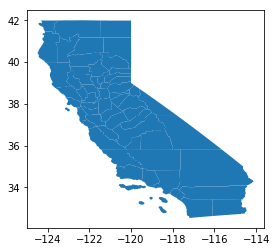

In [7]:
# Get a geo dataframe from the URL
gdf = u.geoframe
gdf[gdf.STATEFP=='06'].plot()

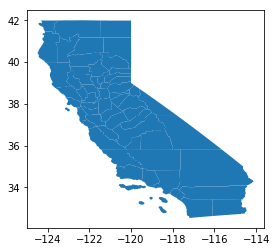

In [8]:
# Get a geo dataframe from the URL
gdf = df.geoframe
gdf[gdf.STATEFP=='06'].plot()

In [9]:
len(df), len(gdf)

(58, 3233)

# Special Features of the CensusDataframe

The ``.titles`` property returns the dataframe with colum names that include the Census column titles, which make it much easier to find the columns you want to use. Combine with ``.head().T`` for an easier-to-read format. 

In [ ]:
u = parse_app_url('census://2016/5/CA/county/B01003')
df = u.dataframe

In [32]:
df.table.descriptions

('GEOID',
 'STUSAB',
 'COUNTY',
 'NAME',
 'TOTAL POPULATION for Total Population% Total',
 '')

In [36]:
from publicdata.census.files.generators import SequenceFile
t = df.table
sf =  SequenceFile(t.year, t.release, t.state_abs[0],t.summary_level, t.seq)
list(sf.descriptions)[:10]

['',
 '',
 '',
 '',
 '',
 '',
 'SEX BY AGE (TWO OR MORE RACES) for People Who Are Two Or More Races% Total:',
 '',
 'SEX BY AGE (TWO OR MORE RACES) for People Who Are Two Or More Races% Male:',
 '']

In [20]:
df.titles.head().T

GEOID,05000US06001,05000US06003,05000US06005,05000US06007,05000US06009
STUSAB,CA,CA,CA,CA,CA
COUNTY,001,003,005,007,009
NAME,"Alameda County, California","Alpine County, California","Amador County, California","Butte County, California","Calaveras County, California"
B01003_001 TOTAL POPULATION for Total Population% Total,1605217,1184,36963,223877,44787
B01003_001_m90,0,191,0,0,0
